## 케라스 작업 절차

1. 데이터셋 생성하기
  - 원본 데이터를 불러오거나 시뮬레이션을 통해 데이터를 생성
  - Training Set, Validation Set, Test Set 생성
  - 데이터 포멧 변환 (학습 및 평가 목적)
1. 모델 구성
  - 시퀀스 모델을 생성한 뒤 필요한 레이어 추가
  - 복잡한 모델 생성시 케라스 API 사용
1. 모델 학습 과정 설정
  - 학습에 대한 설정 수정
  - 손실 함수 및 최적화 방법 정의
  - compile() 함수 사용
1. 모델 학습
  - training set으로 학습
  - fit() 함수 사용
1. 학습 과정 살펴보기
  - 모델 학습 시 Training set과 validation set으로 손실 및 정확도 측정
  - epoch에 따른 손실 및 정확도 추이 파악
1. 모델 평가
  - test set으로 학습 모델 평가
  - evaluate() 함수 사용
1. 모델 사용
  - predict() 함수 이용하여 결과 출력

## 예제

- 패키지 임포트

In [56]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

- 데이터 생성

In [57]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [58]:
x_train = x_train.reshape(60000, 28*28).astype("float")/255.0
x_test = x_test.reshape(10000, 28*28).astype("float")/255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

- 메델 구성하기

In [59]:
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

- 모델 학습 설정

In [60]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

- 모델 학습 시키기

In [61]:
hist = model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.6695 - acc: 0.8303
Epoch 2/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.3499 - acc: 0.9013
Epoch 3/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.3019 - acc: 0.9136
Epoch 4/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.2734 - acc: 0.9221
Epoch 5/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.2521 - acc: 0.9283


- 학습 과정 살펴보기

In [62]:
print('## traing loss and acc ##')
hist.history['loss']

## traing loss and acc ##


[0.66953009915749229,
 0.34990541252295176,
 0.30186901571154595,
 0.27336040011843044,
 0.25205923408667247]

In [63]:
hist.history['acc']

[0.83026666666666671,
 0.90129999999999999,
 0.91364999999999996,
 0.9221166666666667,
 0.92831666666666668]

- 모델 평가하기

In [64]:
loss_and_matrics = model.evaluate(x_test, y_test, batch_size=32)
print(loss_and_matrics)

10000/10000 [==============================] - 0s 26us/step
[0.23298718755692244, 0.93420000000000003]


- 모델 사용하기

In [65]:
xhat = x_test[0:3]
yhat = model.predict(xhat)
yhat

array([[  6.54742107e-05,   5.10649897e-07,   3.38549464e-04,
          1.75670662e-03,   1.01389185e-06,   2.80302356e-05,
          1.41503191e-08,   9.97416615e-01,   1.48100535e-05,
          3.78322322e-04],
       [  1.81983004e-03,   3.14599165e-05,   9.80484545e-01,
          8.17153417e-03,   4.92292358e-08,   1.84261845e-03,
          5.66735351e-03,   2.41484499e-09,   1.98257854e-03,
          8.22676824e-08],
       [  4.20955548e-05,   9.73558366e-01,   1.06533514e-02,
          2.59641767e-03,   2.16928893e-04,   2.20959052e-03,
          1.36602880e-03,   4.85149864e-03,   3.67403915e-03,
          8.31632118e-04]], dtype=float32)

In [66]:
import numpy as np

In [67]:
np.argmax(yhat, axis=1)

array([7, 2, 1])

In [68]:
np.argmax(y_test[0:len(yhat)], axis=1)

array([7, 2, 1])

- 모델 출력

In [69]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [46]:
%matplotlib inline

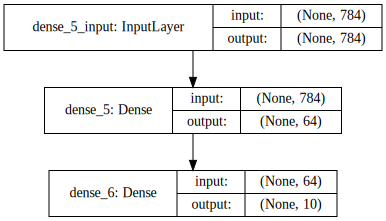

In [47]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

- 모델 저장

In [48]:
from keras.models import load_model

In [49]:
model.save('mnist_mlp_model.h5')

In [50]:
!ls 

ch01.ipynb  mnist_mlp_model.h5


In [51]:
model2 = load_model('./mnist_mlp_model.h5')

In [55]:
xhat = x_test[0:3]
yhat = model2.predict(xhat)
np.argmax(yhat, axis=1)

array([7, 2, 1])